##Importing Libraries

In [ ]:
import numpy as np
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [ ]:
#Collecting Data from Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install split_folders[full]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import splitfolders
input_folder='/content/drive/MyDrive/flower_photos'
splitfolders.ratio(input_folder,'/content/drive/MyDrive/flowers_Rec2',seed=1337,ratio=(0.7,0.2,0.1))

Copying files: 3670 files [24:33,  2.49 files/s]


###Data Preprocessing

###Training Image preprocessing

In [ ]:
# Chargement des ensembles de données
training_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/flowers_Rec2/train',
    labels="inferred",
    label_mode="categorical",
    class_names=['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips'],
    color_mode="rgb",
    batch_size=64,
    image_size=(150, 150),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)


Found 2934 files belonging to 5 classes.


###Validation Image preprocessing

In [ ]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/flowers_Rec2/val',
    labels="inferred",
    label_mode="categorical",
    class_names=['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips'],
    color_mode="rgb",
    batch_size=64,
    image_size=(150, 150),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 1099 files belonging to 5 classes.


###Building Model

In [ ]:
cnn = tf.keras.models.Sequential()

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=16, kernel_size=5,activation='relu',input_shape=[150,150,3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [ ]:
cnn.add(tf.keras.layers.Dropout(0.5))

In [ ]:
cnn.add(tf.keras.layers.Flatten())

In [ ]:
cnn.add(tf.keras.layers.Dense(units=256,activation='relu'))

In [ ]:
cnn.add(tf.keras.layers.Dense(units=5,activation='softmax'))

In [ ]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 146, 146, 16)      1216      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 73, 73, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 71, 71, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 35, 35, 32)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 35, 35, 32)        0         
                                                                 
 flatten (Flatten)           (None, 39200)             0

###Compiling and Training Phase

In [ ]:
cnn.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:

training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=30)

Epoch 1/30
46/46 [==============================] - 218s 4s/step - loss: 232.7176 - accuracy: 0.2365 - val_loss: 1.6317 - val_accuracy: 0.3248
Epoch 2/30
46/46 [==============================] - 12s 241ms/step - loss: 1.5032 - accuracy: 0.3722 - val_loss: 1.2735 - val_accuracy: 0.4741
Epoch 3/30
46/46 [==============================] - 11s 204ms/step - loss: 1.2054 - accuracy: 0.5218 - val_loss: 1.0859 - val_accuracy: 0.5814
Epoch 4/30
46/46 [==============================] - 11s 215ms/step - loss: 0.9607 - accuracy: 0.6530 - val_loss: 0.9010 - val_accuracy: 0.6843
Epoch 5/30
46/46 [==============================] - 11s 211ms/step - loss: 0.7836 - accuracy: 0.7113 - val_loss: 0.7748 - val_accuracy: 0.7425
Epoch 6/30
46/46 [==============================] - 9s 184ms/step - loss: 0.6256 - accuracy: 0.7880 - val_loss: 0.7070 - val_accuracy: 0.7643
Epoch 7/30
46/46 [==============================] - 11s 205ms/step - loss: 0.5093 - accuracy: 0.8265 - val_loss: 0.6678 - val_accuracy: 0.7934


###Saving Model

In [ ]:
cnn.save("trained_model.h5")

In [ ]:
#Recording History
import json
with open('training_hist.json', 'w') as f:
    json.dump(training_history.history, f)

In [ ]:
training_history.history

{'loss': [232.71763610839844,
  1.503205418586731,
  1.2054167985916138,
  0.9606817364692688,
  0.7836233973503113,
  0.6255984306335449,
  0.5093068480491638,
  0.40327349305152893,
  0.3334388732910156,
  0.2870270013809204,
  0.2655194103717804,
  0.22594062983989716,
  0.1790393441915512,
  0.14170680940151215,
  0.1458074301481247,
  0.12282681465148926,
  0.1250062882900238,
  0.09446921199560165,
  0.07997675240039825,
  0.09230143576860428,
  0.09692259132862091,
  0.11974810808897018,
  0.10533890873193741,
  0.08796177059412003,
  0.07971904426813126,
  0.05945689603686333,
  0.049300625920295715,
  0.1237226128578186,
  0.08161811530590057,
  0.06232462450861931],
 'accuracy': [0.2365371435880661,
  0.37218815088272095,
  0.5218132138252258,
  0.6530333757400513,
  0.7113156318664551,
  0.7880027294158936,
  0.8265166878700256,
  0.8663939833641052,
  0.8905930519104004,
  0.9049080014228821,
  0.9260395169258118,
  0.9263803958892822,
  0.9423994421958923,
  0.961145222187

In [ ]:
print(training_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


###Calculating Accuracy of Model Achieved on Test set

In [ ]:
print('Test set Accuracy: {} %'.format(training_history.history['val_accuracy'][-1]*100))


Test set Accuracy: 85.4413092136383 %


##Accuracy Visualization


###Training Visualization

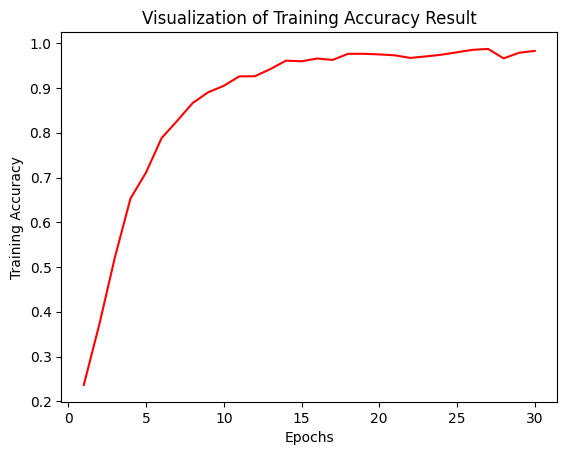

In [ ]:
epochs=[i for i in range(1,31)]
plt.plot(epochs,training_history.history['accuracy'],color='red')
plt.xlabel('Epochs')
plt.ylabel('Training Accuracy')
plt.title("Visualization of Training Accuracy Result")
plt.show()

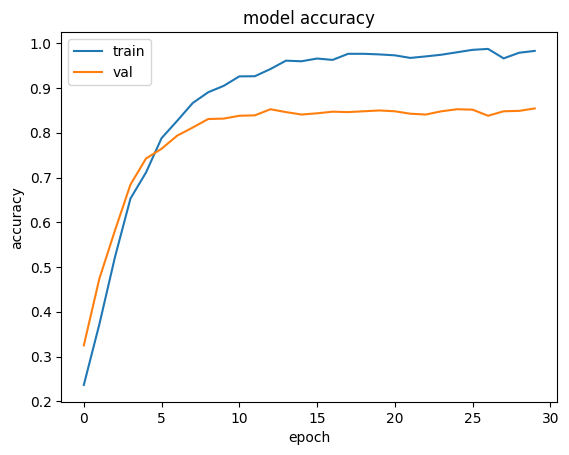

In [ ]:
plt.plot(training_history.history['accuracy'])
plt.plot(training_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

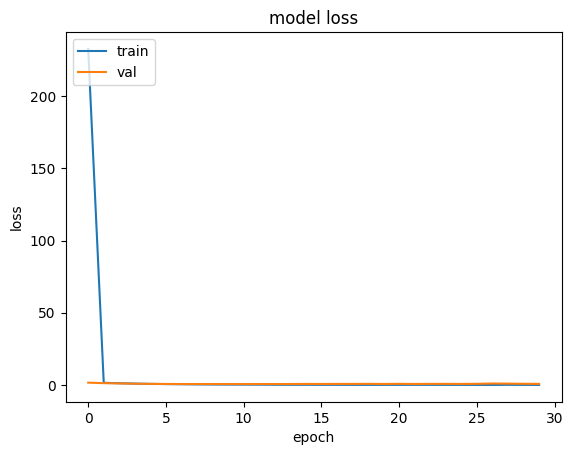

In [ ]:
plt.plot(training_history.history['loss'])
plt.plot(training_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()